In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/saved_model/my_modelBB51_AN')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/AN_data/BB51.csv")
time = df['time'].values
AN = df['ammonia nitrogen'].values
df

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_38 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_39 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_40 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                

,time,ammonia nitrogen
0,0.000000,0.073155
1,0.002903,0.006951
2,0.005805,0.006951
3,0.008708,0.073155
4,0.011611,0.205561
...,...,...
290,0.986938,0.006951
291,0.989842,0.020192
292,0.993471,0.010262
293,0.996373,0.006951


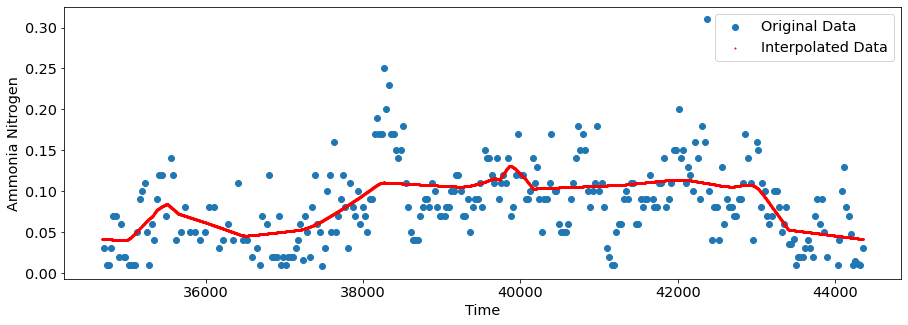

313/313 [==============================] - 0s 337us/step - loss: 3.4314e-16
['loss']


In [2]:
#Transform the normalized scale to real scale
AN_min = 0.0079
AN_max = 0.31
time_min = 34710.00         
time_max = 44356.42          

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(AN_max - AN_min) + AN_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, AN*(AN_max - AN_min) + AN_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Ammonia Nitrogen')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [3]:
interpolation = model.predict([0.078682038
,0.084798297
,0.097445476
,0.103769065
,0.110092655
,0.116519909
,0.122636168
,0.128959757
,0.135283347
,0.141606936
,0.147930525
,0.15435778
,0.160474039
,0.166797628
,0.173121218
,0.179444807
,0.185768396
,0.192195651
,0.198415575
,0.211062754
,0.95569132
,0.958801282
,0.96201491
])
interpolation

array([[0.2471108 ],
       [0.24754141],
       [0.21361361],
       [0.2073024 ],
       [0.2010368 ],
       [0.19466853],
       [0.18860841],
       [0.18230185],
       [0.1758957 ],
       [0.16907722],
       [0.16225879],
       [0.15532844],
       [0.1487335 ],
       [0.14182404],
       [0.13478541],
       [0.1278524 ],
       [0.12500206],
       [0.12588653],
       [0.1276814 ],
       [0.1318646 ],
       [0.12776192],
       [0.12648147],
       [0.12515831]], dtype=float32)